In [ ]:
import jax
import numpy as np
import jax.numpy as jnp

from jax import make_jaxpr
from jax import grad, value_and_grad

import matplotlib.pyplot as plt

In [ ]:
# This operation is performed by a single neuron
def linear_func(x, w, b):
    y = w * x + b
    return y

In [ ]:
x = 4.0
w = 3.0
b = 2.0

linear_func(x, w, b)

14.0

In [ ]:
dx = grad(linear_func)(x, w, b) # w = 3.0
dx

Array(3., dtype=float32, weak_type=True)

In [ ]:
dw = grad(linear_func, argnums= 1)(x, w, b) # x = 4.0
dw

Array(4., dtype=float32, weak_type=True)

In [ ]:
dx, dw, db = jax.grad(linear_func, argnums= (0, 1, 2))(x, w, b)
dx, dw, db

(Array(3., dtype=float32, weak_type=True),
 Array(4., dtype=float32, weak_type=True),
 Array(1., dtype=float32, weak_type=True))

In [ ]:
func_value, dx = value_and_grad(linear_func)(x, w, b)
func_value, dx

(Array(14., dtype=float32, weak_type=True),
 Array(3., dtype=float32, weak_type=True))

# Higher order gradients

In [ ]:
def plot(fn, l=-10, r=10, n=1000):
    x = np.linspace(l, r, num=n)
    y = fn(x)
    plt.plot(x, y)
    plt.show()

In [ ]:
def random_polynomial(x):
    return x**3 + x**2 + x + 1

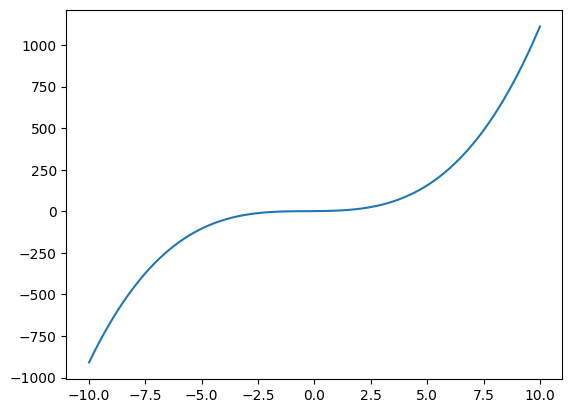

In [ ]:
plot(random_polynomial)

In [ ]:
def plot_grad(fn, l=-10, r=10, n=1000):
    x_array = np.linspace(l, r, num=n)
    y_array = []
    for x in x_array:
        y_array.append(fn(x))
    plt.plot(x_array, y_array)
    plt.show()

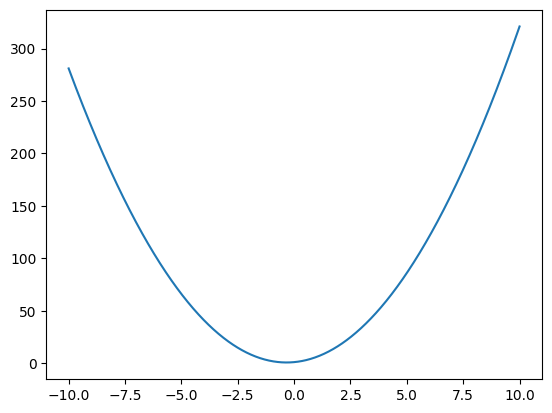

In [ ]:
dfn_dx = grad(random_polynomial) # 3x**2 + 2x + 1
plot_grad(dfn_dx)

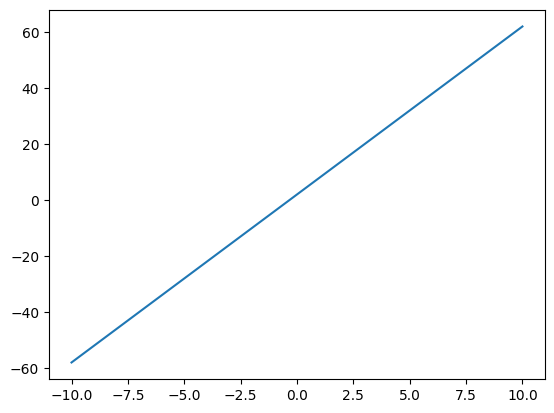

In [ ]:
# Second order derivative
d2fn_dx2 = grad(grad(random_polynomial)) # grad(dfn_dx)
plot_grad(d2fn_dx2) # 6x + 2

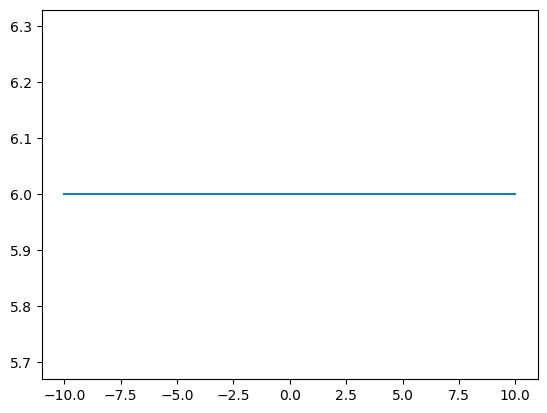

In [ ]:
# Third order derivative
d3fn_dx3 = grad(grad(grad(random_polynomial))) # grad(d2fn_dx2)
plot_grad(d3fn_dx3) # 6

# Jacobians and Hessians

In [ ]:
def f(x):
    return jnp.sum(x**2)

dfdx = grad(f)

In [ ]:
dfdx(4.0)

Array(8., dtype=float32, weak_type=True)

In [ ]:
dfdx(jnp.array([2.0, 3.0, 4.0]))

Array([4., 6., 8.], dtype=float32)

In [ ]:
from jax import jacfwd

def mapping(v):
    x = v[0]
    y = v[1]
    z = v[2]
    return jnp.array([x*y, y*z])

In [ ]:
# 3 inputs, 2 outputs
#
# [d/dx x*y, d/dy x*y, d/dz x*y]
# [d/dx y*z, d/dy y*z, d/dz y*z]
#
# [y, x, 0]
# [0, z, y]

f = jacfwd(mapping)

print(f(jnp.array([2., 3., 4.])))

[[3. 2. 0.]
 [0. 4. 3.]]


In [ ]:
def f(x):
    return jnp.dot(x, x)

def hessian(f):
    return jacfwd(grad(f))

hessian(f)(jnp.array([1., 2., 3.]))

Array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]], dtype=float32)